# Softmax Regression

This notebook contains the code for softmax regression which is multi-class classification technique that uses softmax function.

For concepts refer to below link <br />
http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/ <br />
https://houxianxu.github.io/2015/04/23/logistic-softmax-regression/ <br /> 

We have used sklearn iris dataset which contains 4 features and 3 classes.

### Import  Libraries

In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### Load Data

To create training and testing set we can use sklearn train_test_split feature. 

In [35]:
data = load_iris()
#create train and test set for input and output, test_size represent the % of test data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25)

#no of rows
m = X_train.shape[0]

#As we are using linear equation #for vector multiplication adding a column in X with all the value 1
X = np.hstack((np.ones((m,1)),X_train))

As we have 3 classes for easier computation we will convert our output vector in matrix where no of columns is equal to the no of classes. The values in the matrix will be 0 or 1. For instance the rows where we have output 2 the column 2 will contain 1 and rest all 0

In [36]:
k = np.unique(data.target)
k.sort()

Y = np.zeros((m,len(k)))
    
for cls in k.astype(int):
    Y[np.where(y_train[:] == cls),cls] = 1

### Softmax Function

In [37]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(z.shape[0], 1)

### Softmax Regression Implementation

In [38]:
#define theta with size 3,5 as there are 3 classes and 5 features, lets take the initial value as 0
theta = np.zeros((3,5))

#learning rate
learning_rate = 0.001

#to store cost values
cost_arr = []

#no of iterations we want our model to be trained
no_of_iterations = 50000

#counter
i = 0

for i in range(no_of_iterations):

    #model/hypothesis function
    lineq = np.dot(X, theta.T)
    h = softmax(lineq)

    #Cost function 
    cost = -np.sum(Y * np.log(h)) / m
    cost_arr.append(cost)
    
    #using gradient calculate new theta
    delta = (learning_rate/m) * np.dot((h-Y).T, X)
    theta = theta - delta
    
    i = i + 1

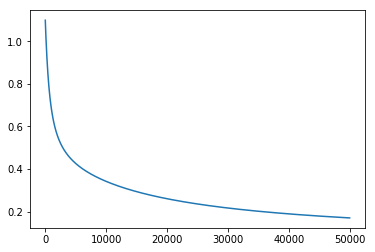

In [39]:
plt.plot(cost_arr)
plt.show()

### Prediction on test data

In [40]:
#no of test samples
m_test = X_test.shape[0]

#As we are using vector implementation adding a column in test_X with all the value 1
X_test = np.hstack((np.ones((m_test,1)),X_test))

probab = softmax(np.dot(X_test,theta.T))
predict = np.argmax(probab, axis=1)

### Comparing our model with scikit library

Lets compare our model with the scikit logistic model. we have used mean square error, variance values and accuracy score for model comparison.

In [41]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score, accuracy_score

#train the model with training data
regr = linear_model.LogisticRegression()
regr.fit(X,y_train)

#Predict our test data
sklearn_predict = regr.predict(X_test)

print('Sklearn')
#coefficients
print('Coefficients: {}'.format(regr.coef_))
# Accuracy score
print("Accuracy score: %.2f" % accuracy_score(sklearn_predict, y_test))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(sklearn_predict, y_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(y_test, sklearn_predict))

print('\n')

print('Our Model')
#coefficients
print('Coefficients: {}'.format(theta))
# Accuracy score
print("Accuracy score: %.2f" % accuracy_score(predict, y_test))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(predict, y_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(y_test, predict))

Sklearn
Coefficients: [[ 0.24578706  0.36898679  1.37908924 -2.14133031 -0.98125376]
 [ 0.59492495  0.38665263 -1.58895035  0.40786056 -0.84585433]
 [-0.88769214 -1.50551632 -1.11084614  2.2408483   2.04152473]]
Accuracy score: 0.95
Mean squared error: 0.05
Variance score: 0.91


Our Model
Coefficients: [[ 0.32908193  0.66547245  1.60358266 -2.21173154 -1.03128204]
 [ 0.35135512  0.58540395 -0.3656433  -0.03723279 -0.63336472]
 [-0.68043704 -1.2508764  -1.23793936  2.24896433  1.66464675]]
Accuracy score: 0.97
Mean squared error: 0.03
Variance score: 0.95
